# Predicting Customer Purchase Behavior from TATA Online Retail Dataset
This notebook aims to predict customer purchase behavior based on the dataset of TATA Online Retail Dataset. The steps include -

- Data Preprocessing
- EDA for understanding correlation
- Algorithm for model selection
- Training and testing
- Result analysis of the generated predictions by metric evaluation and visualization

In [46]:
# import all necessary packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# define file path for the dataset
file_path = 'C:/Users/ASUS/Downloads/archive/Online Retail Data Set.xlsx'

# Read the excel file
df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Explore basic statistical aspects of the dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [5]:
# See the basic informations of all columns and dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


From the above information we can see some columns are missing values. We start data preprocessing by starting handling the missing values.

## Data Preprocessing

In [6]:
# finding total number of missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Description      1454
CustomerID     135080
dtype: int64


There are missing data in both Description and CustomerID column. CustomerID column cannot be imputed given to the type of information it provides. Also as the data amount is sound to work with, dropping the column or deletion is the better approach. 

In [7]:
# Drop missing values 
df = df.dropna()
# Check if any null value remains
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Now we check if there exists any duplicate values for they can create bias. If any duplicate value resides, we drop them

In [8]:
# Check for duplicates
df.duplicated().sum()

5225

In [9]:
# Drop duplicate values
df = df.drop_duplicates()

# Check if still any duplicate remaining
print(df.duplicated().any())

False


The current dataframe does not contain any null or duplicate data. So we analyze the given dataframe to see if their is any discrepencies present. From the given sample all columns contains similar types of data except for StockCode. Majority of the StockCode is of length 5. So we are considering data that has StockCode value of length 5 are valid only. Analyzing that for further checking. 

In [10]:
# Cells containing a StockCode length of more than 5 digits
df[(df.StockCode.str.len())>5].sort_values(by='StockCode').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140929,548491,10123C,HEARTS WRAPPING TAPE,1,2011-03-31 13:14:00,0.65,14064.0,United Kingdom
109611,545655,10123C,HEARTS WRAPPING TAPE,3,2011-03-04 13:58:00,0.65,14670.0,United Kingdom
5451,536863,10123C,HEARTS WRAPPING TAPE,1,2010-12-03 11:19:00,0.65,17967.0,United Kingdom
12492,537382,10124A,SPOTS ON RED BOOKCOVER TAPE,4,2010-12-06 13:13:00,0.42,16710.0,United Kingdom
135094,547881,10124A,SPOTS ON RED BOOKCOVER TAPE,1,2011-03-27 16:08:00,0.42,13110.0,United Kingdom
123794,546913,10124A,SPOTS ON RED BOOKCOVER TAPE,4,2011-03-17 20:18:00,0.42,15861.0,United Kingdom
443058,574686,10124A,SPOTS ON RED BOOKCOVER TAPE,4,2011-11-06 13:00:00,0.42,17608.0,United Kingdom
84458,543397,10124A,SPOTS ON RED BOOKCOVER TAPE,3,2011-02-08 10:32:00,0.42,17859.0,United Kingdom
123793,546913,10124G,ARMY CAMO BOOKCOVER TAPE,4,2011-03-17 20:18:00,0.42,15861.0,United Kingdom
443057,574686,10124G,ARMY CAMO BOOKCOVER TAPE,4,2011-11-06 13:00:00,0.42,17608.0,United Kingdom


In [11]:
# Cells containing a StockCode length of less than 5 digits
df[(df.StockCode.str.len())<5].sort_values(by='StockCode').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
427576,573391,C2,CARRIAGE,1,2011-10-30 14:57:00,50.0,14911.0,EIRE
475573,576904,C2,CARRIAGE,1,2011-11-17 09:25:00,50.0,14931.0,Channel Islands
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
220180,556126,C2,CARRIAGE,1,2011-06-09 10:23:00,50.0,14911.0,EIRE
42332,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.0,14911.0,EIRE
220671,556206,C2,CARRIAGE,1,2011-06-09 13:46:00,50.0,14911.0,EIRE
476327,577009,C2,CARRIAGE,1,2011-11-17 12:05:00,50.0,12749.0,United Kingdom
101857,544934,C2,CARRIAGE,1,2011-02-25 09:01:00,50.0,13345.0,United Kingdom
216938,555858,C2,CARRIAGE,1,2011-06-07 14:12:00,50.0,14911.0,EIRE
392577,570700,C2,CARRIAGE,1,2011-10-12 09:29:00,50.0,14156.0,EIRE


As we can see there are many values where the StockCode is not of length 5 integer, those values do not uniquely identify a product stock code, Those stock codes could mean discount, cancelled or other offer aspects, hence would not provide insight on customer purchase behavior. So dropping those values.

In [12]:
# dropping values where StockCode is not of length 5
df = df.drop(df[((df.StockCode.str.len()) > 5)|((df.StockCode.str.len()) < 5)].index).reset_index(drop=True)
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,366179.0,366179.0,366179,366179.000000,366179,366179.000000,366179.000000,366179
unique,21450.0,2798.0,2998,NaN,NaN,NaN,NaN,37
top,579196.0,22423.0,REGENCY CAKESTAND 3 TIER,NaN,NaN,NaN,NaN,United Kingdom
freq,485.0,1894.0,1894,NaN,NaN,NaN,NaN,325525
mean,NaN,NaN,NaN,12.279874,2011-07-12 06:05:03.255129344,2.927796,15282.488594,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-08 13:14:00,1.250000,13941.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-08-02 10:34:00,1.850000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 19:51:00,3.750000,16782.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,NaN


In [13]:
# Converting the CustomerID column from float64 to Integer
df['CustomerID'] = df['CustomerID'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366179 entries, 0 to 366178
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    366179 non-null  object        
 1   StockCode    366179 non-null  object        
 2   Description  366179 non-null  object        
 3   Quantity     366179 non-null  int64         
 4   InvoiceDate  366179 non-null  datetime64[ns]
 5   UnitPrice    366179 non-null  float64       
 6   CustomerID   366179 non-null  Int64         
 7   Country      366179 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 22.7+ MB


We provide a checking if all the values in quantity column is of positive value, because if not those are not valid points or could mean cancelled products. We check for negative quantity and if found would drop them

In [14]:
df_new = df[df.Quantity < 0]
df_new.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
195,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
196,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
197,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
198,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
199,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
200,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
201,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
795,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom
1240,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841,United Kingdom
1241,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841,United Kingdom


From the dataframe shown we can see there exists data with negative quantity and the Invoice No of those products have a C in front of them which also makes the Invoice No of more than length 5. They would not impact on the purchase behavior as those are cancelled orders. So we are dropping them. 

In [15]:
# Dropping values with negative quantity which may have Invoice String of a length more than 5
df = df[(df.Quantity > 0) | ((df.InvoiceNo.str.len())==5)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
2,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
3,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
4,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
...,...,...,...,...,...,...,...,...
366174,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
366175,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
366176,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
366177,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [16]:
# Finding Categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['InvoiceNo', 'StockCode', 'Description', 'Country']


From the categorical columns present, encoding InvoiceNo, StockCode and Description columns would not have any significant impact on our further procedures as those datas do not provide any insight on buying pattern or retail relevancy. Which is why despite being categorical data those are left from being encoded.

In [17]:
# Convert 'Country' columns to string type
df['Country'] = df['Country'].astype(str)

# One-hot encoding for 'Country'
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Display the updated DataFrame
df.head(10)

  InvoiceNo StockCode                        Description  Quantity  \
0    536365     71053                WHITE METAL LANTERN         6   
1    536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
2    536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
3    536366     22633             HAND WARMER UNION JACK         6   
4    536366     22632          HAND WARMER RED POLKA DOT         6   
5    536367     84879      ASSORTED COLOUR BIRD ORNAMENT        32   
6    536367     22745         POPPY'S PLAYHOUSE BEDROOM          6   
7    536367     22748          POPPY'S PLAYHOUSE KITCHEN         6   
8    536367     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
9    536367     22310            IVORY KNITTED MUG COSY          6   

          InvoiceDate  UnitPrice  CustomerID  Country_Austria  \
0 2010-12-01 08:26:00       3.39       17850            False   
1 2010-12-01 08:26:00       7.65       17850            False   
2 2010-12-01 08:26:00       4.25  

In [18]:
# Checking the updated dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358309 entries, 0 to 366178
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     358309 non-null  object        
 1   StockCode                     358309 non-null  object        
 2   Description                   358309 non-null  object        
 3   Quantity                      358309 non-null  int64         
 4   InvoiceDate                   358309 non-null  datetime64[ns]
 5   UnitPrice                     358309 non-null  float64       
 6   CustomerID                    358309 non-null  Int64         
 7   Country_Austria               358309 non-null  bool          
 8   Country_Bahrain               358309 non-null  bool          
 9   Country_Belgium               358309 non-null  bool          
 10  Country_Brazil                358309 non-null  bool          
 11  Country_Canada    

As the dataframe contains two integer type columns i.e. Quantity and UnitPrice, we can use feature scaling on those two. 

Most of the columns existing in the dataset are not directly connected to buying pattern of the customer so we create a few aggregated functions and add them as columns to better understand the customer and their purchases. We would use the newly created dataframe for our model implementation. 

In [30]:
# Creating a new dataframe to add more aggregated columns to use later
df_new1 = df

# Adding new columns Month, Year for further analysis in the context of the year and seasonality 
df_new1['Month']=df.InvoiceDate.dt.month.astype('Int64')
df_new1['Year']=df.InvoiceDate.dt.year.astype('Int64')

# Adding Total amount spend on purchases to the new dataframe
df_new1['Amount']=df.Quantity * df.UnitPrice

# Adding the total purchased amount as a column for each unique CustomerID to the new dataframe
df_new1['PurchasedAmount'] = df.groupby('CustomerID')['Amount'].transform('sum')

# Adding the number of unique invoices for each CustomerID to the new dataframe
df_new1['NumInvoices'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Adding the number of purchases for each CustomerID to the new dataframe
df_new1['NumPurchases'] = df.groupby('CustomerID')['Quantity'].transform('sum')

# Adding the average number of items purchased for each CustomerID 
df_new1['AvgItemsPurchased'] = df['NumPurchases'] / df['NumInvoices']

# Calculate the mean unit price for each CustomerID
df_new1['AvgUnitPrice'] = df.groupby('CustomerID')['UnitPrice'].transform('mean')

# Calculate the total spend for each CustomerID
total_spend = df.groupby('CustomerID')['Amount'].sum().reset_index()
total_spend.columns = ['CustomerID', 'TotalSpend']

# Merge the total spend back to the original DataFrame
df_new1 = pd.merge(df, total_spend, on='CustomerID', how='left')

# Check if any duplicated values exist
df_new1.duplicated().sum()

# Check the newly created dataframe
df_new1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_Unspecified,Month,Year,Amount,PurchasedAmount,NumInvoices,NumPurchases,AvgItemsPurchased,AvgUnitPrice,TotalSpend
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,False,False,False,...,False,12,2010,20.34,3689.25,34,1169,34.382353,4.329811,3689.25
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,False,False,False,...,False,12,2010,15.30,3689.25,34,1169,34.382353,4.329811,3689.25
2,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,False,False,False,...,False,12,2010,25.50,3689.25,34,1169,34.382353,4.329811,3689.25
3,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,False,False,False,...,False,12,2010,11.10,3689.25,34,1169,34.382353,4.329811,3689.25
4,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,False,False,False,...,False,12,2010,11.10,3689.25,34,1169,34.382353,4.329811,3689.25


Here we standardize our input variables and apply dimensionality reduction to further modify our input features. The columns dropped from the dataset includes the column aimed for prediction and those of which can either generate bias on output (last 3 columns) or those which has no impact on the output variable(First 4 columns). Here, we are considering Total expenditure of a customer to predict their purchase behavior. It describes how much a customer might spend on a certain time given the geogrphical information, seasonality and their past purchase history.

In [31]:
# Separate features from target variable and drop columns not to be included in input variable
X = df_new1.drop(['InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'Quantity', 'TotalSpend', 'UnitPrice'], axis=1)
y = df_new1['TotalSpend']

# Standardize the input variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Dimensionality Reduction on the input variables
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

X = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## EDA on dataset

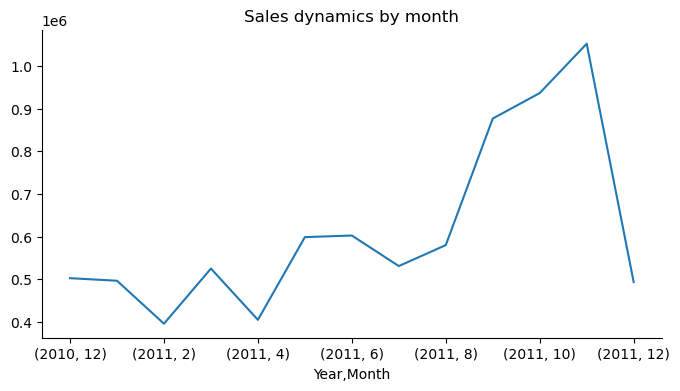

In [22]:
# Summary table to analyze the dynamics of sales by month
df_1 = pd.pivot_table(df_new1,
               index=["Year", "Month"],
               values=["Amount"],
               aggfunc=np.sum)
df_1['Amount'].plot(kind='line', figsize=(8, 4), title='Sales dynamics by month')
plt.gca().spines[['top', 'right']].set_visible(False)

This shows seasonality impact on customer purchase in general, the purchase is at peak in between november to december

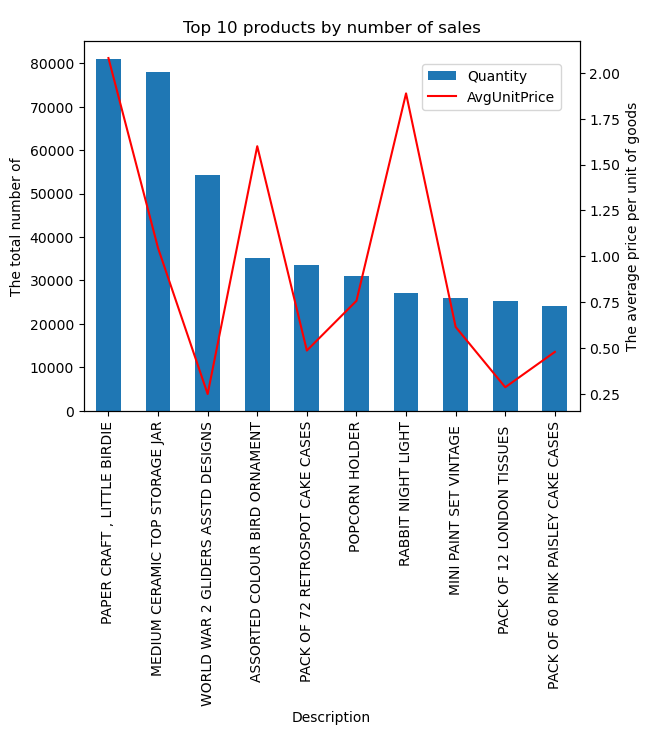

In [23]:
# Products the are most sold 
most_grossing = df_new1.groupby('Description',as_index=False)[['Quantity', 'Amount']].sum().sort_values(by='Quantity',
                                                                                               ascending=False).head(10)
most_grossing['AvgUnitPrice'] = most_grossing.Amount/most_grossing.Quantity

ax = most_grossing.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
most_grossing.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('Top 10 products by number of sales')
ax.set_ylabel('The total number of')
ax2.set_ylabel('The average price per unit of goods')
plt.show()

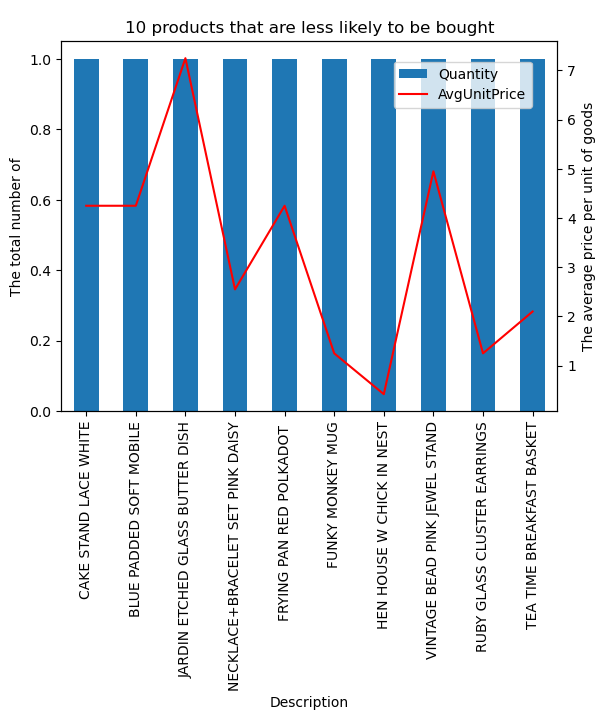

In [24]:
# Least sold products
least_grossing = df_new1.groupby('Description',as_index=False)[['Quantity','Amount']].sum().sort_values(by='Quantity').head(10)
least_grossing['AvgUnitPrice'] = least_grossing.Amount/least_grossing.Quantity

ax = least_grossing.plot(x="Description", y="Quantity", legend=False,kind='bar')
ax2 = ax.twinx()
least_grossing.plot(x="Description", y="AvgUnitPrice", ax=ax2, legend=False, color="r")
ax.figure.legend(loc=(.65,.85))
plt.title('10 products that are less likely to be bought')
ax.set_ylabel('The total number of')
ax2.set_ylabel('The average price per unit of goods')
plt.show()

In [25]:
# Most sold products and generated amount
most_grossing = df_new1[['Description', 'Amount',]].groupby('Description').sum().sort_values('Amount', ascending=False).head(10)

most_grossing.style.bar(align='mid', color='blue')

,Amount
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600000
REGENCY CAKESTAND 3 TIER,142264.750000
MEDIUM CERAMIC TOP STORAGE JAR,81416.730000
PARTY BUNTING,68785.230000
ASSORTED COLOUR BIRD ORNAMENT,56413.030000
RABBIT NIGHT LIGHT,51251.240000
CHILLI LIGHTS,46265.110000
PAPER CHAIN KIT 50'S CHRISTMAS,42584.130000
PICNIC BASKET WICKER 60 PIECES,39619.500000


In [26]:
# Least sold products and generated amount
least_grossing = df_new1[['Description', 'Amount',]].groupby('Description').sum().sort_values('Amount').head(10)

least_grossing.style.bar(align='mid', color='red')

,Amount
Description,
HEN HOUSE W CHICK IN NEST,0.420000
SET 12 COLOURING PENCILS DOILEY,0.650000
VINTAGE BLUE TINSEL REEL,0.840000
PINK CRYSTAL GUITAR PHONE CHARM,0.850000
PURPLE FRANGIPANI HAIRCLIP,0.850000
60 GOLD AND SILVER FAIRY CAKE CASES,1.100000
RUBY GLASS CLUSTER EARRINGS,1.250000
SET 36 COLOURING PENCILS DOILEY,1.250000
FUNKY MONKEY MUG,1.250000


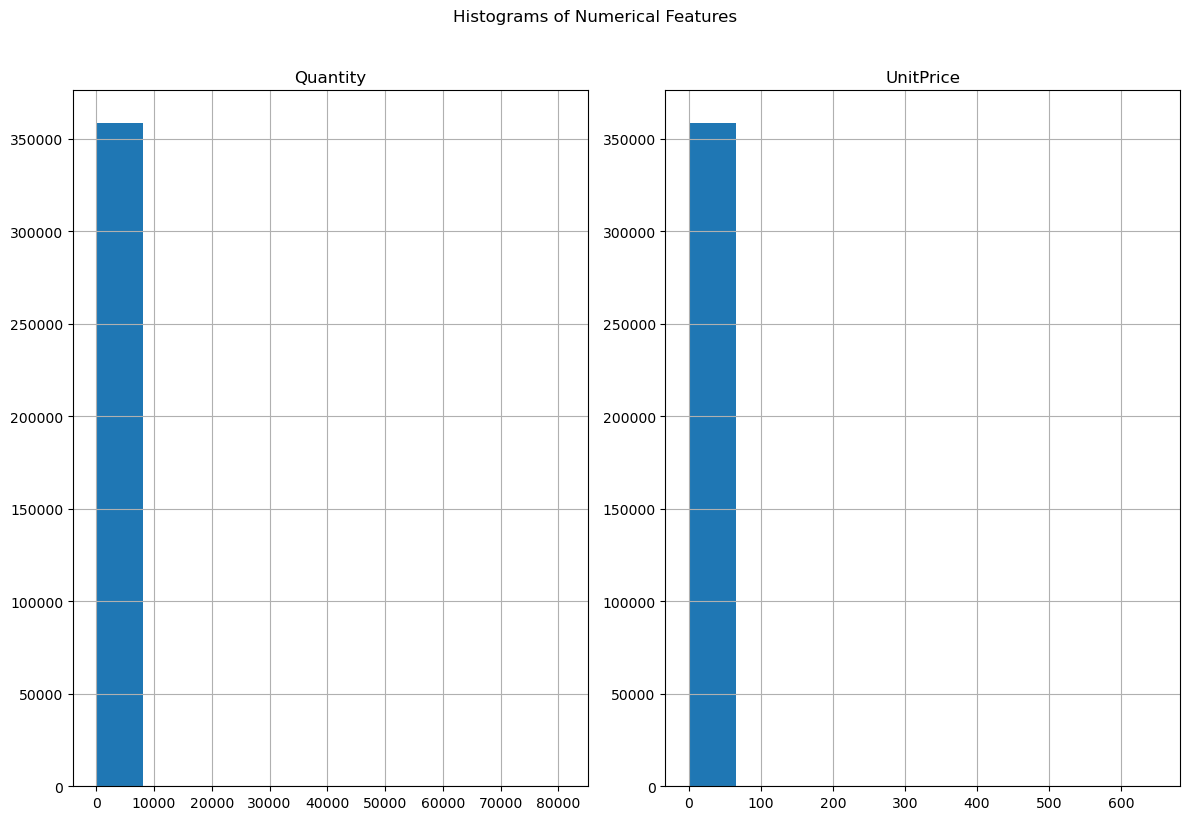

In [27]:
# Histogram
numerical_cols = ['Quantity', 'UnitPrice']
df[numerical_cols].hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

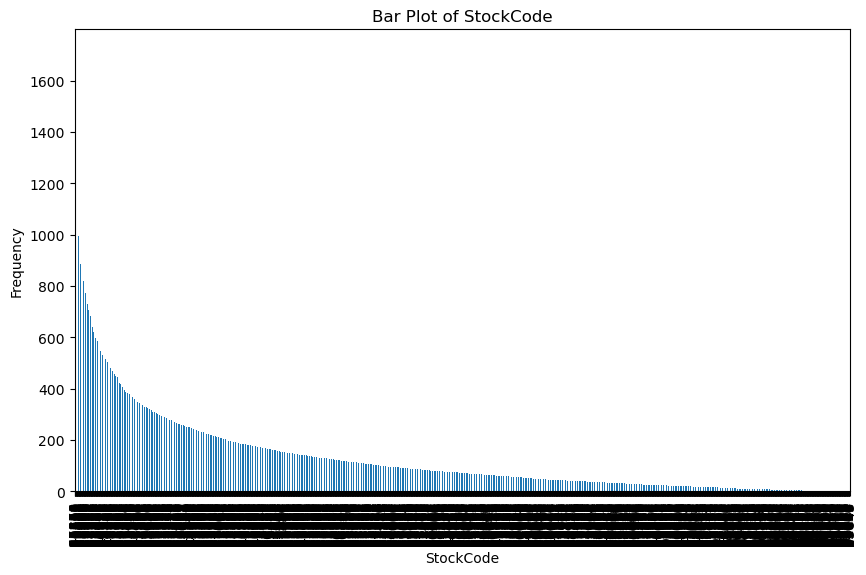

In [33]:
# Bar Plot
df['StockCode'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title(f'Bar Plot of StockCode')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.show()

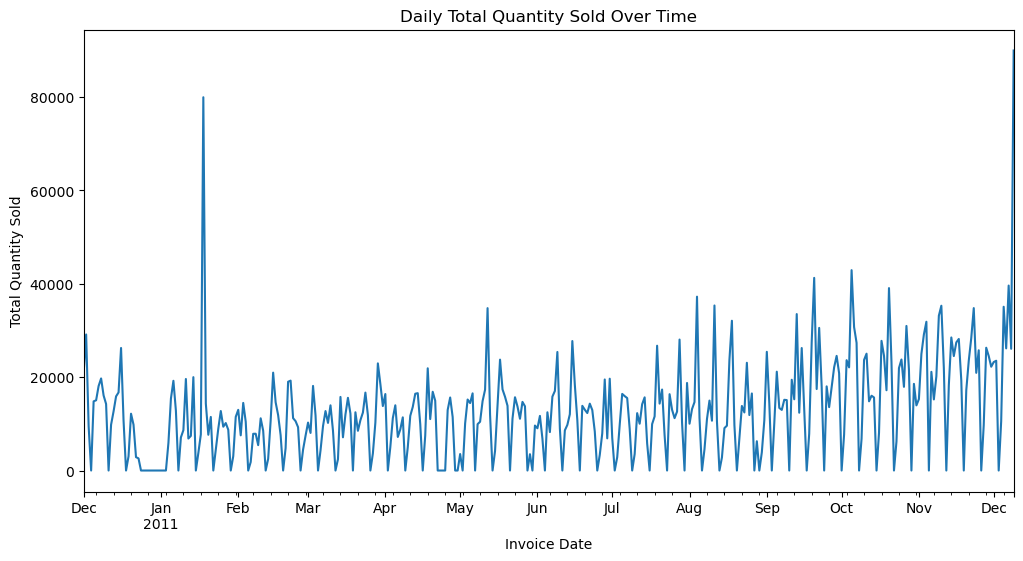

In [34]:
#Time Series Analysis
df.set_index('InvoiceDate')['Quantity'].resample('D').sum().plot(figsize=(12, 6))
plt.title('Daily Total Quantity Sold Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity Sold')
plt.show()

<Axes: >

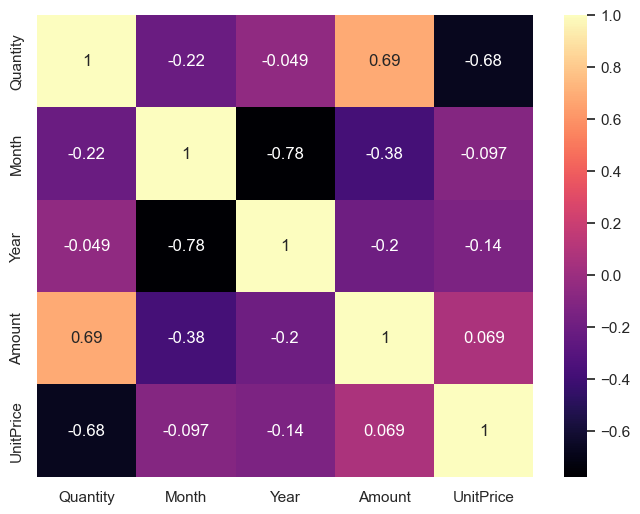

In [35]:
# Correlation calculation and heatmap for the features
df_corr = df_new1[['Quantity', 'Month', 'Year', 'Amount', 'UnitPrice']].corr(method='spearman')

sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_corr.corr(), annot=True, cmap='magma')

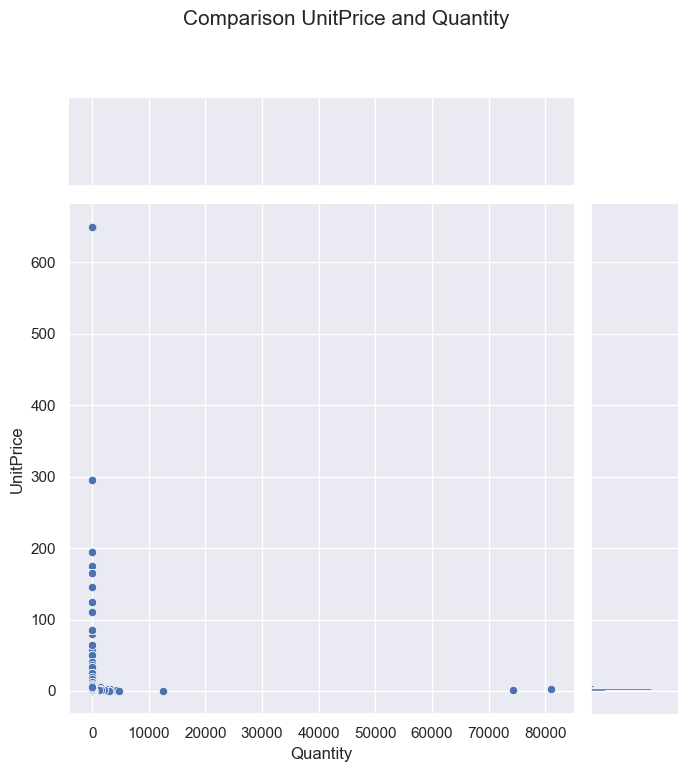

In [36]:
Corr = sns.jointplot(x="Quantity", y="UnitPrice", data = df, height = 7)
Corr.fig.suptitle("Comparison UnitPrice and Quantity", fontsize = 15, y = 1.1)
plt.show()

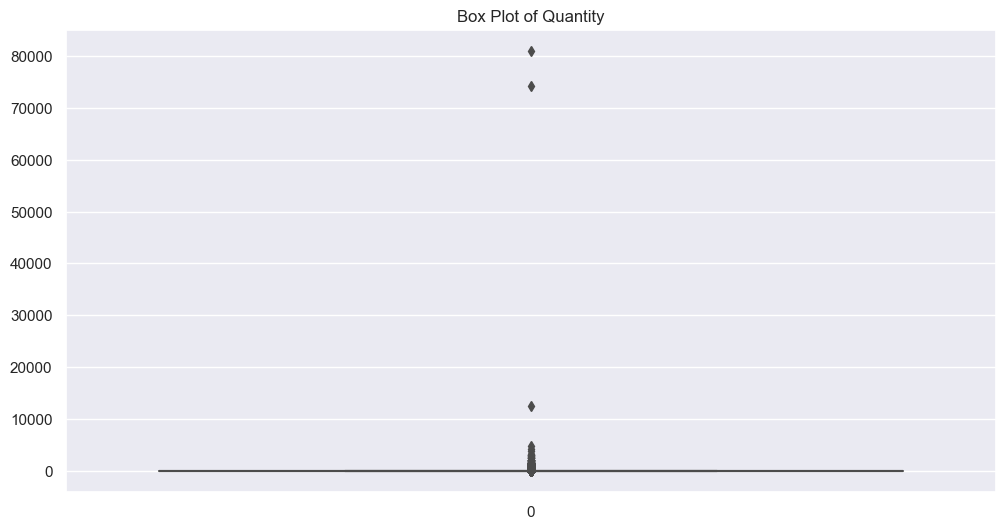

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()

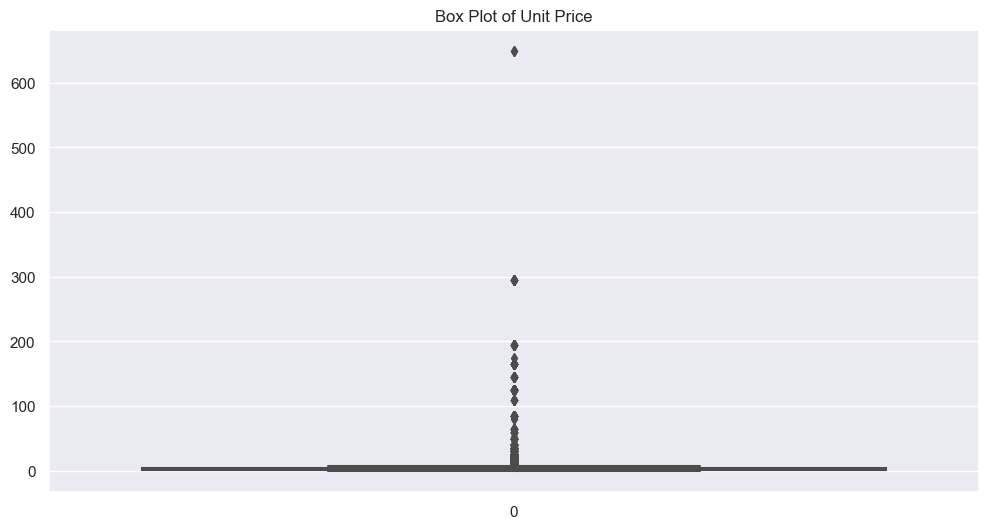

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.show()

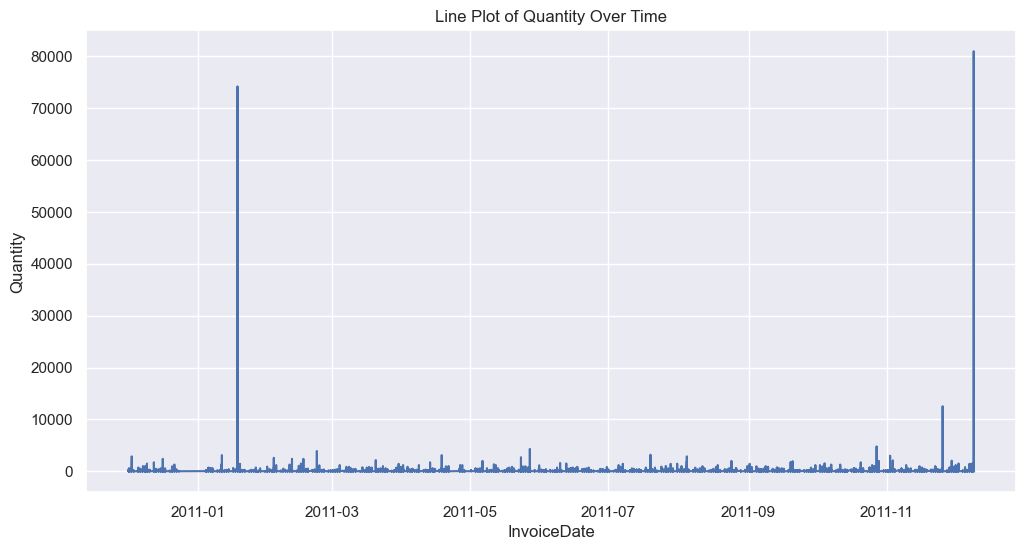

In [39]:
# Line plot for time series analysis (e.g., 'InvoiceDate' vs 'Quantity')
plt.figure(figsize=(12, 6))
plt.plot(df['InvoiceDate'], df['Quantity'])
plt.title('Line Plot of Quantity Over Time')
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.show()

From the EDA we can establish correlation among the columns relevant to the aggregated prediction column Total Spend. Existing columns are mostly used in EDA to identify whether they impact the output or not. Because the aggregated functions were already generated keeping the interest in mind to have impact on prediction variable. Univariate, Bivariate, Multivariate analysis has been executed to better understand the correlation among the variables. 

## Algorithm for model selection

As we are trying to predict continous values of the output column rather than classifying we select regression algorithms. We would use RandomForestRegressor and GradientBoostingRegressor and evaluate the results. Also compare prediction for both models and see which one produces better result. 

In [40]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            indices = np.random.choice(len(X), size=len(X), replace=True)
            tree.fit(X.iloc[indices], y.iloc[indices])
            self.trees.append(tree)
            
    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / self.n_estimators

In [41]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        prediction = np.mean(y)  # Initialize with mean value
        for _ in range(self.n_estimators):
            residuals = y - prediction
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            
            prediction += self.learning_rate * tree.predict(X)
            
    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

## Training and Testing 

In [42]:
# RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [43]:
# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

## Using Evaluation Metric to analyze results

#### Evaluation for Random Forest Regressor 

In [49]:
# Calculate MAE
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate R-squared
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error (MAE): 471.0876409395347
Root Mean Squared Error (RMSE): 974.6876066613708
R-squared: 0.9988783605723368


The MAE, RMSE scores are satisfactory. To further reduce errors hyperparameter tuning could be done. R2 score is close to 1 so we can say the model performance is quite good. To further analyze we can plot them and visualize in scatter plot.

#### Evaluation for Gradient Boosting Regressor

In [50]:
# Calculate MAE
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Calculate RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

# Calculate R-squared
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R-squared: {gb_r2}")

Mean Absolute Error (MAE): 10358.302449459736
Root Mean Squared Error (RMSE): 10479.319957156507
R-squared: 0.8703452057588501


The MAE, RMSE scores are satisfactory. To further reduce errors hyperparameter tuning could be done. R2 score is close to 1 so we can say the model performance is quite good. But as we can see the Random Forest Regressor performed better in all error calculation aspects. To further analyze we can plot them and visualize in scatter plot.

## Visualization for model performance evaluation

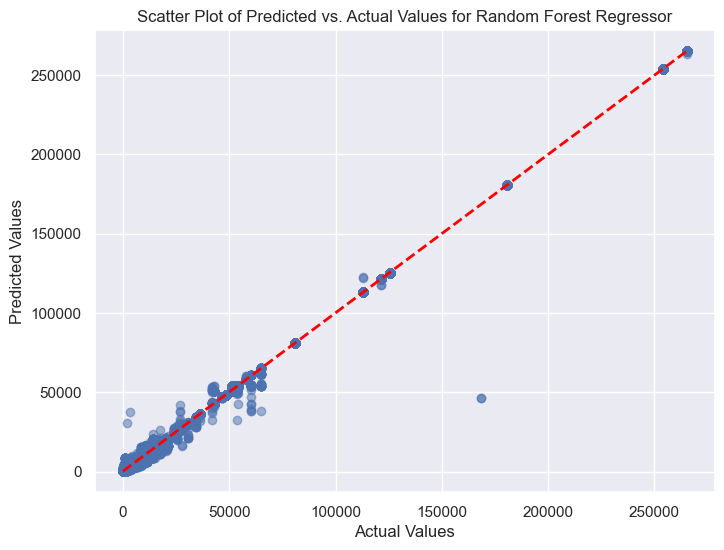

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [rf_predictions.min(), rf_predictions.max()], '--', color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values for Random Forest Regressor')
plt.show()

As we can see the scatter plot shows the actual vs predicted values and the values almost reside all linerally. So we can say the model performance is satisfactory. 

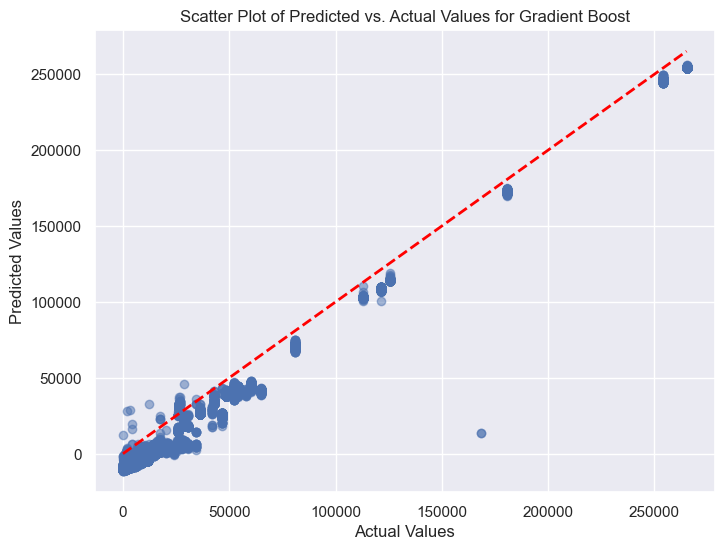

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [rf_predictions.min(), rf_predictions.max()], '--', color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values for Gradient Boost')
plt.show()

This plot for Gradient Boosting Regressor also shows the actual vs predicted values and the values almost reside all linerally. So we can say this model performance is satisfactory as well. 

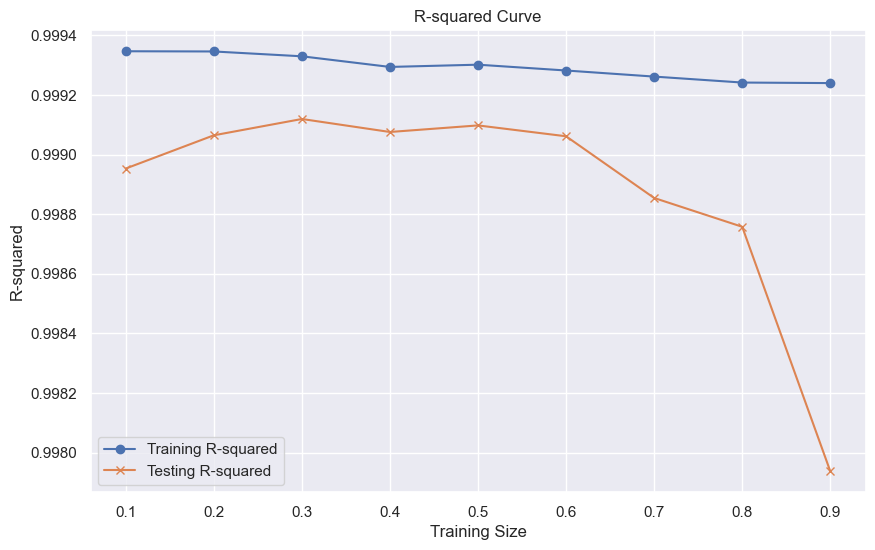

In [60]:
# R2 Curve for Random Forest Regressor
train_r2 = []
test_r2 = []
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Loop over different training sizes
for size in train_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    
    # Predict on training and testing sets
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)

    # Calculate R-squared for training and testing sets
    train_r2.append(r2_score(y_train, rf_train_predictions))
    test_r2.append(r2_score(y_test, rf_test_predictions))

# Plotting the R-squared curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_r2, label='Training R-squared', marker='o')
plt.plot(train_sizes, test_r2, label='Testing R-squared', marker='x')
plt.xlabel('Training Size')
plt.ylabel('R-squared')
plt.title('R-squared Curve')
plt.legend()
plt.grid(True)
plt.show()

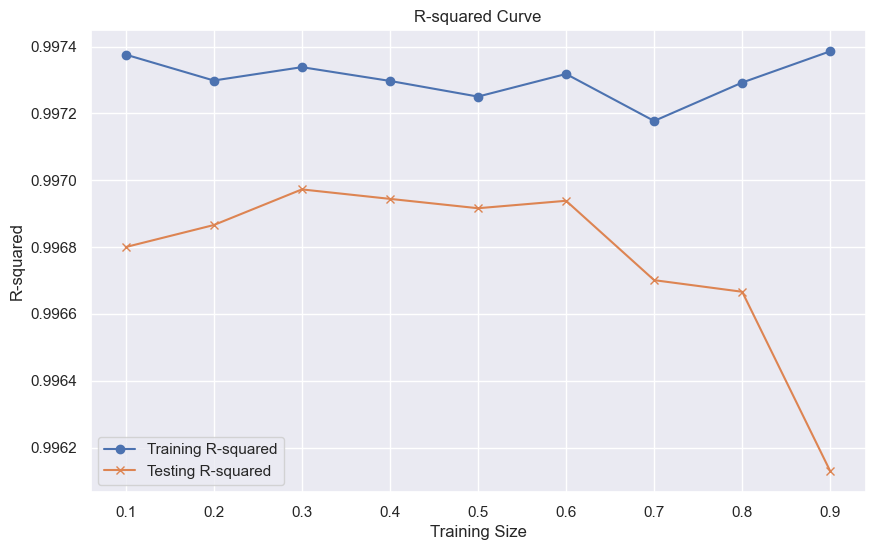

In [62]:
# R2 Curve for Gradient Boosting Regressor

train_r2_gb = []
test_r2_gb = []
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Loop over different training sizes
for size in train_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # GradientBoostingRegressor
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    gb_model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    gb_train_predictions = gb_model.predict(X_train)
    gb_test_predictions = gb_model.predict(X_test)

    # Calculate R-squared for training and testing sets
    train_r2_gb.append(r2_score(y_train, gb_train_predictions))
    test_r2_gb.append(r2_score(y_test, gb_test_predictions))

# Plotting the R-squared curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_r2_gb, label='Training R-squared', marker='o')
plt.plot(train_sizes, test_r2_gb, label='Testing R-squared', marker='x')
plt.xlabel('Training Size')
plt.ylabel('R-squared')
plt.title('R-squared Curve')
plt.legend()
plt.grid(True)
plt.show()

The R2 Curve shows the ultimate optimal Testing Size for both Random Forest Regressor and Gradient Boosting Regressor is 0.3. This was kept in the actual model training as this was the most optimal point. 

From the above dataset analysis we can now further tweak to understand more on the customer purchase behavior. Current model performance shows satisfactory performance on the dataset. Insights from the exploration - 
- The customers prefer seasonal shopping times as seen from the time series analysis
- Purchase Behavior is impacted by unit price 
- Geographical impact can be seen 